
# Qubits Múltiples  y Entangled States

Los qubits individuales son interesantes, pero individualmente no ofrecen ninguna ventaja computacional. En este apartado veremos cómo representar varios qubits y cómo pueden interactuar entre sí. Hemos visto cómo podemos representar el estado de un qubit utilizando un vector 2D, ahora veremos cómo podemos representar el estado de múltiples qubits.



## Representando el estado de Multi-Qubit <a id="represent"></a>

Como ya hemos visto en el anterior apartado, el estado de un qubit tiene dos amplitudes representadas por numeros complejos. Si extendemos esta idea a dos qubits, podemos decir que tiene cuatros posibles estados. 


`00` `01` `10` `11`

Y además para describir el estado de dos qubits se requieren cuatro amplitudes indicadas por cuatro números complejos. De acuerdo con esta idea la representación que utilizaremos será la siguiente:


$$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

Siendo $a_{i,j}$ números complejos.

Las probabilidades se calculan de la misma manera que para un qubit


$$ p(|00\rangle) = |\langle 00 | a \rangle |^2 = |a_{00}|^2$$

Y también se debe cumplir la condición de normalización:


$$ |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1$$

Cuando tenemos dos qubits separados, podemos describir su estado conjunto mediante el *producto de kronecker*:
```{index} kronecker producto
```

$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ 
|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}
$$

Y siguiendo las mismas reglas, podemos utilizar el *producto de kronecker* para describir el estado colectivo de cualquier número de qubits. A continuación se muestra un ejemplo con tres qubits:


$$ 
|cba\rangle = \begin{bmatrix} c_0 b_0 a_0 \\ c_0 b_0 a_1 \\ c_0 b_1 a_0 \\ c_0 b_1 a_1 \\
                              c_1 b_0 a_0 \\ c_1 b_0 a_1 \\ c_1 b_1 a_0 \\ c_1 b_1 a_1 \\
              \end{bmatrix}
$$

Si tenemos $n$ qubits, necesitaremos tener en cuenta un total de $2^n$ amplitudes complejas. Como vemos, estos vectores crecen exponencialmente con el número de qubits. Esta es la razón por la que los ordenadores cuánticos con un gran número de qubits son tan difíciles de simular. Un portátil moderno puede simular fácilmente un estado cuántico general de unos 20 qubits, pero simular 100 qubits es demasiado difícil incluso para los mayores superordenadores.

A continuación mostramos un circuito con tres qubits, y una serie de pertas lógicas


In [8]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

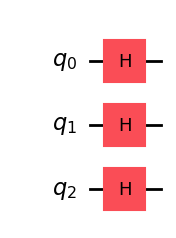

In [9]:
qc = QuantumCircuit(3)
# Aplicamos un apuerta H a cada uno de qubits:
for qubit in range(3):
    qc.h(qubit)
# Mostramos el circuito
qc.draw(output='mpl', style='iqp')

Cada qubit tiene como salida el estado $|+\rangle$, ya que $H|0\rangle$ da como resultado el estado $|+\rangle$. Por lo tanto el vector de salida será:


$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

Veamos que esto es cierto utilizando código de qiskit.

```{index} aer_simulator, state-vector (get)
```

In [10]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
#qobj = assemble(qc)
#final_state = svsim.run(qobj).result().get_statevector()
final_state = svsim.run(qc).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

Obteniendo el resultado esperado.

Podemos también obtener la representación matricial de las tres puertas de Hadamar que se han utilizado, es decir el resultado de la siguiente expresión:

$$H\otimes H \otimes H $$

Siendo el producto anterior el denominado producto tensorial o producto de kronecker, cuyo significado ya se ha comentado anteriormente.

```{index} Unitary matrix (get)
```

In [11]:

qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)


qc.save_unitary()
#qobj = assemble(qc)
#unitary = svsim.run(qobj).result().get_unitary()
unitary = svsim.run(qc).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

### Quick Ejercicios: <a id="ex1"></a>

1.	Escribir el producto de kronecker de los siguintes qubits:    
    a)	$|0\rangle|1\rangle$    
    b)	$|0\rangle|+\rangle$    
    c)	$|+\rangle|1\rangle$    
    d)	$|-\rangle|+\rangle$    
2.	Escribir el estado de:
    $|\psi\rangle = \tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{i}{\sqrt{2}}|01\rangle $
    como dos qubits separados.


## Single Qubit Gates on Multi-Qubit Statevectors <a id="single-qubit-gates"></a>

Ya hemos visto que una puerta X,que actúa sobre un sólo qubit ,queda representada por una matriz 2x2 de la siguiente manera:


$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

Y que por consiguiente actúa sobre un estado $|0\rangle$ de la siguiente manera:

$$
X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix}
$$

Pero puede que no esté claro cómo actuaría una puerta X sobre un qubit en un vector multiqubit. Afortunadamente, la regla es bastante sencilla; igual que utilizamos el producto kronecker para calcular vectores de estado multiqubit, utilizamos el producto tensor para calcular matrices que actúan sobre estos vectores de estado. Por ejemplo, en el circuito de abajo:


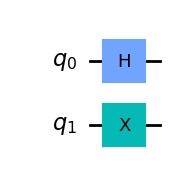

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw(output='mpl')


podemos representar las operaciones simultáneas (H & X) utilizando su producto de kronecker, de la siguiente manera:

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

Estas operaciones se harían de la siguiente manera:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

$$
= \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} 
$$

$$
= \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Matriz que luego podemos aplicar a nuestro vector de estado (*statevector*) 4D $|q_1 q_0\rangle$. Utilizando tanto numéro quizá no veamos con claridad qué resultado se obtiene,por ese motivo a menudo se ve la notación más clara de la siguiente manera:


$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

En lugar de calcular esto a mano,como se ha hecho anteriormente, podemos utilizar el `aer_simulator` de Qiskit para que lo calcule por nosotros. El simulador Aer multiplica todas las puertas de nuestro circuito para compilar una única matriz unitaria que ejecuta todo el circuito cuántico:


In [13]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
#qobj = assemble(qc)
#unitary = usim.run(qobj).result().get_unitary()
unitary = usim.run(qc).result().get_unitary()

y obteniendo como resultado el siguiente:

In [14]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

Si queremos aplicar una puerta sólo a un qubit a la vez (como en el circuito que mostramos a continuación de este párrafo), lo describimos usando el producto de kronecker con la matriz identidad, y así por ejemplo:

$$ X \otimes I $$

Esta expresión, utilizando qiskit sería de la siguiente manera:

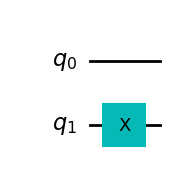

In [15]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw(output='mpl')

Y la matriz unitaria que obtenemos sería la siguiente:

In [16]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
#qobj = assemble(qc)
unitary = usim.run(qc).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

Podemos ver que Qiskit ha realizado el producto kronecker:


$$
X \otimes I =
\begin{bmatrix} 0 & I \\
               I & 0\\
\end{bmatrix} = 
\begin{bmatrix} 0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                1 & 0 & 0 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

### Quick Ejercicios: <a id="ex2"></a>

1. Calcular la matriz unitaria ($U$) obtenida mediante la siguiente secuencia de operaciones de puertas de qubits: $U = XZH$. Utilizar el aer_simulator de qiskit para comprobar el resultado obtenido de forma manual.

2. Prueba a cambiar las puertas del circuito anterior. Calcula su producto de Kronecker y comprueba tu respuesta con el simulador Aer.


**Nota:** Diferentes libros, softwares y sitios web ordenan los qubits de forma diferente a como se ha expuesto aquí y en el sentido con el que trabaja qiskit. Esto significaría que el producto kronecker de un mismo circuito puede parecer muy diferente. Tenlo en cuenta cuando consultes otras fuentes. 


## Multi-Qubit Gates <a id="multi-qubit-gates"></a>

Ahora que sabemos cómo representar el estado de múltiples qubits, estamos preparados para aprender cómo interactúan los qubits entre sí. Una puerta importante de dos qubits es la puerta CNOT, que a continuación se pasa a explicar.

```{index} CNOT- Gate
```

###  CNOT-Gate <a id="cnot"></a>


Esta puerta es *una puerta condicional* que ejecuta una puerta-X en el segundo qubit (objetivo o target), si el estado del primer qubit (control) es $|1\rangle$. La puerta se dibuja en un circuito como el que se muestra a continuación, con `q0` como control y `q1` como objetivo:

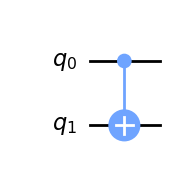

In [17]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw(output='mpl')

Cuando nuestros qubits no están en superposición de $|0\rangle$ o $|1\rangle$ (comportándose como bits clásicos), esta puerta es muy sencilla e intuitiva de entender. Podemos utilizar la tabla de verdad clásica siguiente:

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |

Y actuando sobre nuestro vector estado 4D, tiene una de las dos matrices siguientes:


$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

dependiendo de qué qubit es el control y cuál es el objetivo. Diferentes libros, simuladores y documentos ordenan los qubits de forma diferente. En nuestro caso, la matriz de la izquierda corresponde a la CNOT del circuito anteriormente dibujado. Esta matriz intercambia las amplitudes de $|01\rangle$ y $|11\rangle$ en nuestro vector de estado:


$$ 
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

Hemos visto cómo actúa sobre estados clásicos, pero veamos ahora cómo actúa sobre un qubit en superposición. Pondremos un qubit en el estado $|+\rangle$:


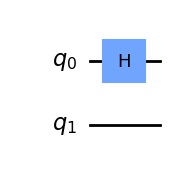

In [18]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw(output='mpl')

In [19]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
#qobj = assemble(qc)
final_state = svsim.run(qc).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

Como es de esperar, esto genera el estado $|0\rangle \otimes |{+}\rangle = |0{+}\rangle$ (recordar que $H|0\rangle$ genera el estado $|+\rangle$):

$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$

Y veamos qué ocurre cuando aplicamos la puerta CNOT, con qiskit:


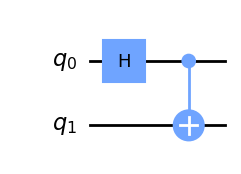

In [20]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw(output='mpl')

In [21]:
# Let's get the result:
qc.save_statevector()
#qobj = assemble(qc)
result = svsim.run(qc).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

Es decir obtenemos el siguiente estado:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

```{index} Entangled state,Bell state
```

Este estado es muy interesante para nosotros, porque está _entangled._ Esto nos lleva claramente a la siguiente sección.

###  Entangled States <a id="entangled"></a>

```{index} Bell state
```

Vimos en la sección anterior que podíamos crear el estado siguiente:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

Este estado es conocido como **_Bell_ state**. Podemos ver que este estado tiene un 50% de probabilidad de ser medido en el estado $|00\rangle$, y un 50% de probabilidad de ser medido en el estado $|11\rangle$. Lo más interesante es que tiene un **0%** de probabilidad de ser medido en los estados $|01\rangle$ o $|10\rangle$. Podemos ver esto de forma gráfica en Qiskit:


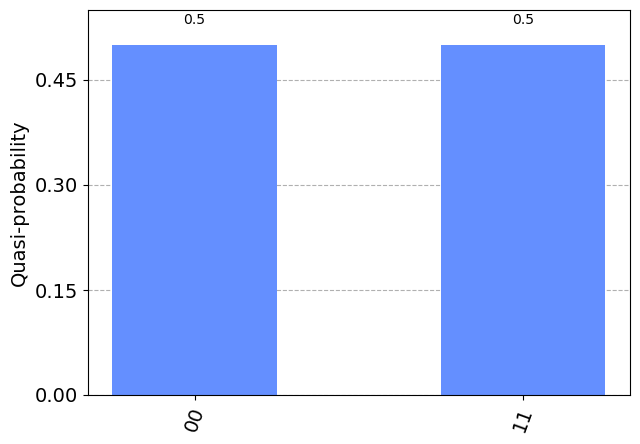

In [25]:
from qiskit.visualization import plot_distribution

# con plot_histogram da un warning de que está deprecated
plot_distribution(result.get_counts())

Este estado combinado *no puede escribirse como dos estados qubit separados*, lo que tiene interesantes implicaciones. Aunque nuestros qubits están en superposición, medir uno nos dirá el estado del otro y colapsará su superposición. Por ejemplo, si medimos el qubit superior y obtenemos el estado $|1\rangle$, el estado colectivo de nuestros qubits cambia así:


$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle
$$

Aunque separemos estos qubits a años luz de distancia, la medición de uno de ellos colapsa la superposición y parece tener un efecto inmediato sobre el otro. Esta es la ['espeluznante acción a distancia'](https://en.wikipedia.org/wiki/Quantum_nonlocality) que perturbó a tantos físicos a principios del siglo XX.

Es importante señalar que el resultado de la medición es aleatorio, y que las estadísticas de medición de un qubit **no** se ven afectadas por ninguna operación en el otro qubit. Debido a esto, no hay **ningún modo** de utilizar estados cuánticos compartidos para comunicarse. Esto se conoce como el teorema de la no-comunicación.



### Visualización de Entangled States<a id="visual"></a>

Hemos visto que este estado no se puede escribir como dos estados qubit separados, esto también significa que perdemos información cuando intentamos graficar nuestro estado en esferas de Bloch separadas:

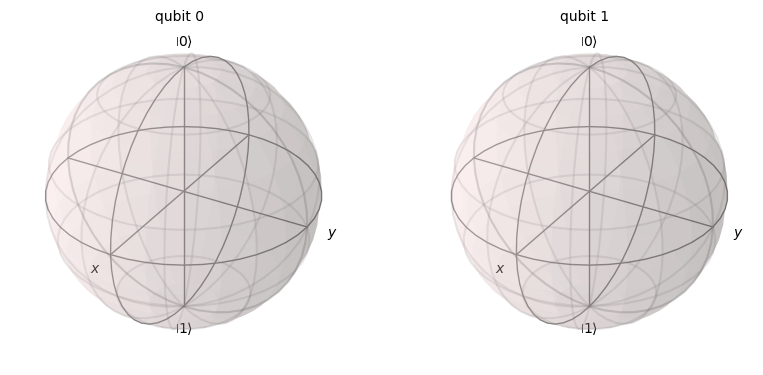

In [26]:
plot_bloch_multivector(final_state)

Teniendo en cuenta cómo hemos definido la esfera de Bloch en los capítulos anteriores, puede que no esté claro cómo Qiskit incluso calcula los vectores de Bloch con qubits enredados como éste. En el caso de un solo qubit, la posición del vector de Bloch a lo largo de un eje se corresponde perfectamente con el valor de expectativa de la medición en esa base. Si tomamos esto como _la_ regla de trazado de los vectores de Bloch, llegamos a la conclusión anterior. Esto nos muestra que no hay _ninguna_ base de medida de un solo qubit para la que esté garantizada una medida específica. Esto contrasta con nuestros estados de qubit único, en los que siempre podríamos elegir una base de qubit único. Si observamos los qubits individuales de este modo, pasamos por alto el importante efecto de la correlación entre los qubits. No podemos distinguir entre diferentes estados entrelazados. Por ejemplo, los dos estados

$$\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \quad \text{and} \quad \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

tendrán ambas el mismo aspecto en estas esferas de Bloch separadas, a pesar de ser estados muy diferentes con resultados de medición distintos.

¿De qué otra forma podríamos visualizar este vector de estado? Este vector de estado es simplemente una colección de cuatro amplitudes (números complejos), y hay infinitas formas de representarlo en una imagen. Una de ellas es la "Q-sphere", en la que cada amplitud está representada por una mancha en la superficie de una esfera. El tamaño de la mancha es proporcional a la magnitud de la amplitud, y el color es proporcional a la fase de la amplitud. En el ejemplo que estamos contemplando, las amplitudes para $|00\rangle$ y $|11\rangle$ son iguales, y todas las demás amplitudes son 0:



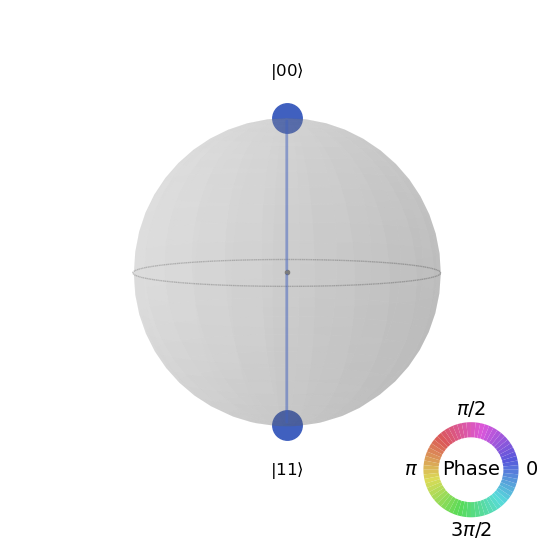

In [27]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)


Aquí podemos ver claramente la correlación entre los qubits. La forma de la esfera Q no tiene ningún significado, es simplemente una forma agradable de organizar nuestros blobs; el número de `0`s en el estado es proporcional a la posición de los estados en el eje Z, así que aquí podemos ver que la amplitud de $|00\rangle$ está en el polo superior de la esfera, y la amplitud de $|11\rangle$ está en el polo inferior de la esfera.

### Ejercicios: <a id="ex3"></a>
1. Crear un circuito cuántico que produzca el estado de Bell: $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.
   Utiliza el simulador de vectores de estado para verificar tu resultado.
   
2. El circuito que has creado en la pregunta 1 transforma el estado $|00\rangle$ a $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$, calcula la matriz unitaria de este circuito utilizando el simulador de Qiskit. Comprueba que esta matriz unitariz realiza la transformación correcta.

3.  Piensa en otras formas de representar visualmente un vector de estado. ¿Puedes diseñar una visualización interesante en la que puedas leer la magnitud y la fase de cada amplitud?

##  Referencias

[1] Asher Peres, Daniel R. Terno, _Quantum Information and Relativity Theory,_ 2004, https://arxiv.org/abs/quant-ph/0212023

In [18]:
import qiskit.tools.jupyter
%qiskit_version_table